In [1]:
# @title Imports
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import random as rand
import scipy.constants as const
import math
import itertools
from matplotlib import cbook, cm
from matplotlib.colors import LightSource

# ***Ising Model - No Interactions***

The energy is:  $E=−μh∑S_i$

Assuming:  $h=1⋅K_bT$

$T=300K$

In [2]:
# @title Constants definition { display-mode: "form" }

T = 300
Kb = const.Boltzmann/(1.602*(10**-19)) #Boltzmann in eV
h = 1*Kb*T
mu_magnetic_moment = 1

In [3]:
# @title Energy and magnetization functions: { display-mode: "form" }
def calculate_config_energy(z):
  return(-mu_magnetic_moment*h*np.sum(z))

def calculate_config_magnetiztion(z):
  return(np.sum(z))

### **Demo - Manual propagation**

In [4]:
# @title Genrates random grid { display-mode: "form" }
plt.style.use('_mpl-gallery-nogrid')

Nx = 5
Ny = 5
number_of_spins = Nx*Ny

### Random Starting Grid
Z = np.random.choice([-0.5,0.5],(Nx,Ny))

**We start at a random grid of spins**

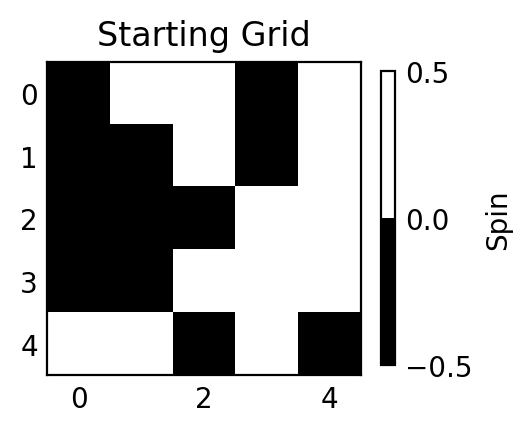

In [5]:
# @title Displays Grid { display-mode: "form" }
fig, ax = plt.subplots(dpi=200)
cmap = colors.ListedColormap(['black', 'white'])
norm = colors.BoundaryNorm([-0.5,0,0.5], cmap.N)
im = ax.imshow(Z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax, label='Spin', shrink=0.75)
plt.title('Starting Grid')
plt.show()

In [6]:
#step 0 - calculate current configuration energy
state_energy = calculate_config_energy(Z)
print(state_energy)

-0.01292742509363296


In [7]:
#step 1 - choose random spin
random_x = rand.randrange(0,Nx)
random_y = rand.randrange(0,Ny)
print(f'Flip spin at (row,col) : ({random_x},{random_y})')

Flip spin at (row,col) : (2,0)


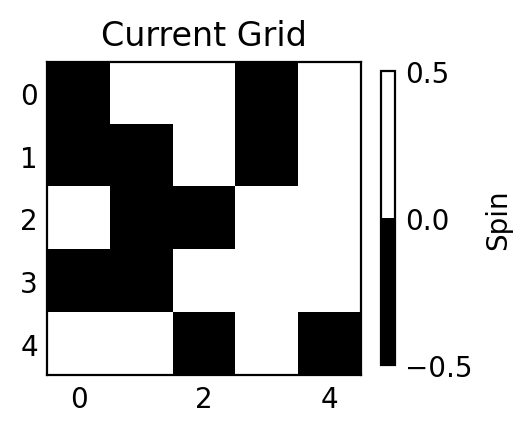

In [8]:
#step 2 - flip spin
Z[random_x, random_y] = -Z[random_x, random_y]

fig, ax = plt.subplots(dpi=200)
cmap = colors.ListedColormap(['black', 'white'])
norm = colors.BoundaryNorm([-0.5,0,0.5], cmap.N)
im = ax.imshow(Z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax, label='Spin', shrink=0.75)
plt.title('Current Grid')
plt.show()

In [9]:
#step 3 - calculate energy of new config
new_energy = calculate_config_energy(Z)
print(f'The previous state energy was: {state_energy} and the new energy is: {new_energy}')

The previous state energy was: -0.01292742509363296 and the new energy is: -0.03878227528089888


In [ ]:
#step 4 - Monte Carlo condition for accepting change
if new_energy <= state_energy:
    state_energy = new_energy
else:
    delta_energy = new_energy - state_energy
    p = rand.random()
    P_condition = math.exp(-(delta_energy)/(Kb*T))
    print(f'We accept change w.p: {P_condition:.3f}, we choose randomly the value p={p:.3f}')
    if p < P_condition:
        state_energy = new_energy
    else:
        Z[random_x, random_y] = -Z[random_x, random_y]

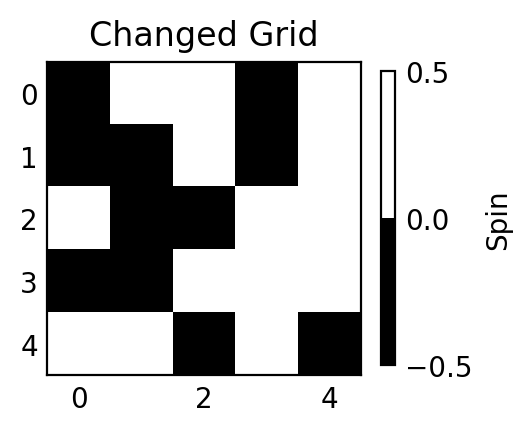

In [11]:
fig, ax = plt.subplots(dpi=200)
cmap = colors.ListedColormap(['black', 'white'])
norm = colors.BoundaryNorm([-0.5,0,0.5], cmap.N)
im = ax.imshow(Z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax, label='Spin', shrink=0.75)
plt.title('Changed Grid')
plt.show()

### **Continuous Propagation using Monte-Carlo Metropolis-Hastings Method**

## **Random grid starting point**

In [12]:
# @title Genrates random grid { display-mode: "form" }
plt.style.use('_mpl-gallery-nogrid')

Nx = 25
Ny = 25
number_of_spins = Nx*Ny

### Random Starting Grid
Z = np.random.choice([-0.5,0.5],(Nx,Ny))

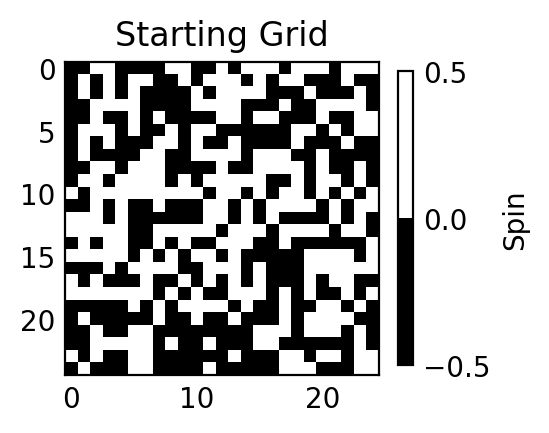

In [13]:
# @title Displays Grid { display-mode: "form" }
fig, ax = plt.subplots(dpi=200)
cmap = colors.ListedColormap(['black', 'white'])
norm = colors.BoundaryNorm([-0.5,0,0.5], cmap.N)
im = ax.imshow(Z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax, label='Spin', shrink=0.75)
plt.title('Starting Grid')
plt.show()

In [14]:
# @title Monte-Carlo metropolis hastings method: { display-mode: "form" }
#Monte-Carlo - Metropolis Hastings Method
energy_list_by_T = []
average_magnetization_per_spin_list_by_T = []
grids = []
properties_dictionary = {} #Key = temprature, Value = [Grid, energy, magnetization]
iterations = 12500
max_temp = 501
T = range(1, max_temp, 10)

for t in T:
  energy_list = []
  magnetization_list = []
  Z_copy = Z.copy()
  initial_energy = calculate_config_energy(Z_copy)
  energy_list.append(initial_energy)
  average_magnetization = calculate_config_magnetiztion(Z_copy)/number_of_spins
  magnetization_list.append(average_magnetization)
  for i in range(iterations):
    #step 0 - calculate current configuration energy
    previous_energy = calculate_config_energy(Z_copy)

    #step 1 - choose random spin
    random_x = rand.randrange(0,Nx)
    random_y = rand.randrange(0,Ny)

    #step 2 - flip spin
    Z_copy[random_x, random_y] = -Z_copy[random_x, random_y]

    #step 3 - calculate energy of new config
    new_energy = calculate_config_energy(Z_copy)

    #step 4 - Monte Carlo condition for accepting change
    if new_energy <= previous_energy:
      previous_energy = new_energy
    else:
      delta_energy = new_energy - previous_energy
      p = rand.random()
      P_condition = math.exp(-(delta_energy)/(Kb*t))
      if p < P_condition:
        previous_energy = new_energy
      else:
        Z_copy[random_x, random_y] = -Z_copy[random_x, random_y]

    energy_list.append(previous_energy)
    average_magnetization = calculate_config_magnetiztion(Z_copy)/number_of_spins
    magnetization_list.append(average_magnetization)

  properties_dictionary[t] = [Z_copy, previous_energy, average_magnetization]
  energy_list_by_T.append(energy_list)
  average_magnetization_per_spin_list_by_T.append(magnetization_list)

energy_list_by_T = np.array(energy_list_by_T)
average_magnetization_per_spin_list_by_T = np.array(average_magnetization_per_spin_list_by_T)


average_energy_per_spin = calculate_config_energy(Z_copy)/number_of_spins
average_magnetization_per_spin = calculate_config_magnetiztion(Z_copy)/number_of_spins

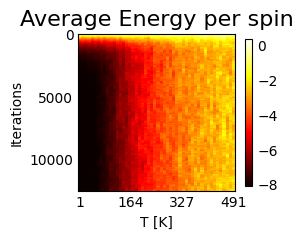

In [15]:
# @title Displays average energy graph { display-mode: "form" }

X = np.array(T)
Y = np.array(range(iterations))
z1 = energy_list_by_T.transpose()
aspect = len(X)/len(Y)

plt.imshow(z1, cmap='hot', interpolation='nearest', aspect=aspect)
plt.colorbar(shrink=0.75)
plt.title('Average Energy per spin', {'fontsize': 16})
new_ticks = np.linspace(min(X), max(X), 4, dtype=int)  # 10 evenly spaced ticks
plt.xticks(np.linspace(0, len(X)-1, len(new_ticks)), new_ticks)
plt.xlabel('T [K]')
plt.ylabel('Iterations')
plt.show()

**Grid configuration at different tempratures**

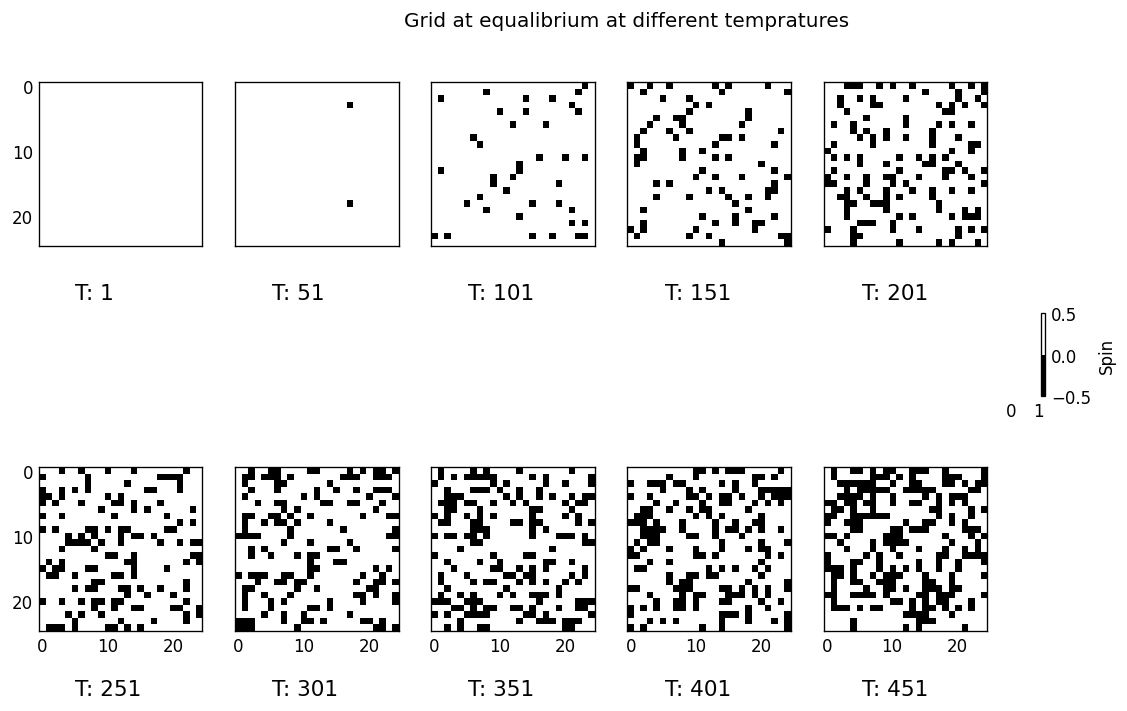

In [16]:
# @title Displays grid configs { display-mode: "form" }
Z_by_T = [properties_dictionary[t][0] for t in range(1,max_temp,50)]
Nr = 2
Nc = int(len(Z_by_T)/2)

fig, axs = plt.subplots(Nr, Nc, sharex='col', sharey='row', figsize=(10,6), dpi = 120)
fig.suptitle('Grid at equalibrium at different tempratures')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.445, 0.05, 0.115], frameon=False)
cbar_ax.tick_params(left=False, labelleft=False,bottom=False, top=False)

images = []
cmap = colors.ListedColormap(['black', 'white'])
norm = colors.BoundaryNorm([-0.5,0,0.5], cmap.N)
c=0
for i in range(Nr):
    for j in range(Nc):
      data = Z_by_T[c]
      im = axs[i, j].imshow(data, cmap=cmap, norm=norm)
      images.append(im)
      axs[i, j].label_outer()
      fig.text(j/(Nc*1.22) + 0.04 , 1 - (1.1*i/Nr + 0.42), f"T: {range(1,max_temp,50)[c]}", fontdict={'fontsize': 13})
      c += 1

fig.colorbar(images[5], ax=cbar_ax, label='Spin', extend='neither', fraction=0.5)
plt.show()

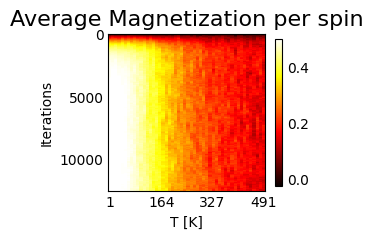

In [17]:
# @title Displays average magnetization { display-mode: "form" }

X = np.array(T)
Y = np.array(range(iterations))
z2 = average_magnetization_per_spin_list_by_T.transpose()
aspect = len(X)/len(Y)

plt.imshow(z2, cmap='hot', interpolation='nearest', aspect=aspect)
plt.colorbar(shrink=0.75)
plt.title('Average Magnetization per spin', {'fontsize': 16})
new_ticks = np.linspace(min(X), max(X), 4, dtype=int)  # 10 evenly spaced ticks
plt.xticks(np.linspace(0, len(X)-1, len(new_ticks)), new_ticks)
plt.xlabel('T [K]')
plt.ylabel('Iterations')
plt.show()

## **Spin down starting point**

In [18]:
### Code Goes Here ###

## **Spin up starting point**

In [19]:
### Code Goes Here ###

## Questions:

1.1 What is the average energy for a spin in a 2D grid with $\mu = 1, h=K_bT,$ $T=const$? What is the average magnetizatio $\left<s\right>$ ? **Reach the expression analytically**

1.2 Does the simulation reaches an equilibrium? Show a figure that supports this claim.

1.3 How does the simulation differs when we increase the number of **spins or iterations**?

1.4 Plot the distribution of the system for different ratios $\frac{h}{K_bT}$. Explain what are you seeing in text.

1.5 What are the flactuations of energy and magnetization for each ratio? Show a figure that compares them and explain in text the meaning from a **physical and statistical** point of view.

1.6 Change the initial conditions for the simulation (Random grid, spin up grid and spin down grid) does the system reached the same **macroscopic** state?

1.7 Does the simulation match the analytical result from 1.1?

# **Question 2 - adding Nearest Neighbours interactions**

The energy is: $E=-J⋅∑S_iS_j-μh∑S_i$

Assuming: $h=0$

Final energy expression: $E=-J⋅∑S_iS_j$

## Questions:

2.1 Start from different initial grid (like 1.6), calculate average magnetization and average energy for $J=5K_bT$, assume $h=0$ Does the system reach the same equilibrium state?

2.2 Calculate again for high tempratures, $J=\frac{1}{2}K_bT$ what is the change in the equilibrium state?

2.3 What will happen when we add an external field? **Must - Answer in text.** **Optional - Perform Simulation**

2.4 The Ising Model is a classical model in statistical mechanics: **1:** What physical phenomena does it describe? **2:** Did you see it in you simulations? **3:** Can you suggest a way to calculate the temprature (ratio between field and temprature) at which this phase change happens?  